# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('linearly_separable_sets.csv')

In [3]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [5]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = classification_report(y_test, y_pred, output_dict=True)
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


SVM (Linear Kernel) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg

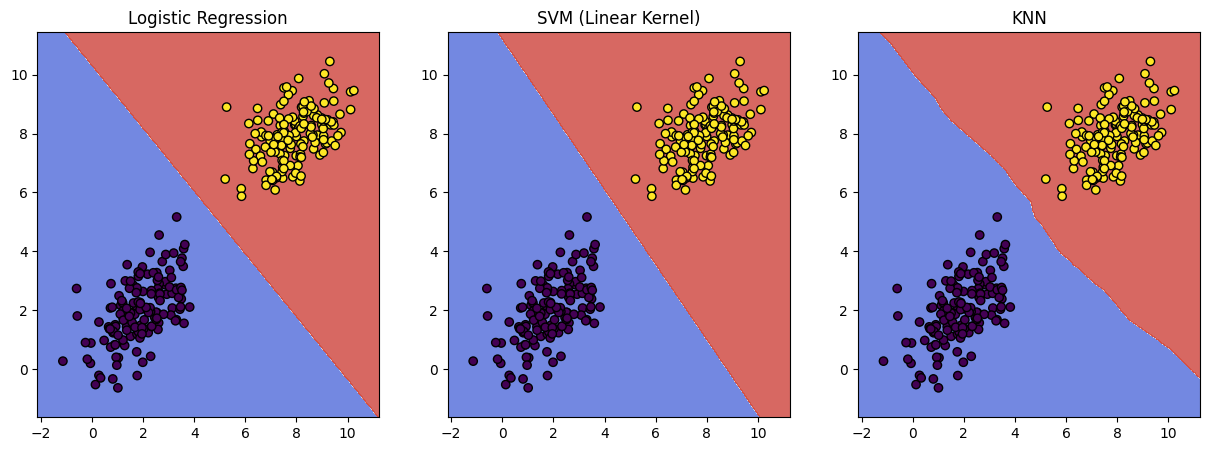

In [6]:
def plot_decision_boundary(model, X, y, ax, title):
    
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    ax.set_title(title)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, model) in zip(axs, models.items()):
    plot_decision_boundary(model, X_test, y_test, ax, name)
    
plt.show()

**Аналіз отриманих результатів**:

1.   Для даного набору даних підйшли всі моделі, так як він є лінійно роздільним.

2.   Логістична регресія та SVM демонструють практично рівний поділ.

3.   KNN модель намагається розділити набір даних відносно кожної точки (найближчих сусідів іншими словами), звідси лінія розподілу викривлюється.



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [7]:
df = pd.read_csv('overlapping_classes.csv')

In [8]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
models = {
    "Logistic Regression": LogisticRegression(multi_class='ovr', max_iter=1000),
    "SVM (Linear Kernel)": SVC(kernel='linear', decision_function_shape='ovr'),
    "KNN": KNeighborsClassifier(n_neighbors=7)
}

In [10]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = classification_report(y_test, y_pred, output_dict=True)
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.93      0.89        83
           2       0.94      0.86      0.90       111
           3       0.97      1.00      0.99        76

    accuracy                           0.92       270
   macro avg       0.92      0.93      0.92       270
weighted avg       0.92      0.92      0.92       270


SVM (Linear Kernel) Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.94      0.90        83
           2       0.95      0.88      0.92       111
           3       0.99      1.00      0.99        76

    accuracy                           0.93       270
   macro avg       0.94      0.94      0.94       270
weighted avg       0.94      0.93      0.93       270


KNN Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.94      0.91        83
           2 

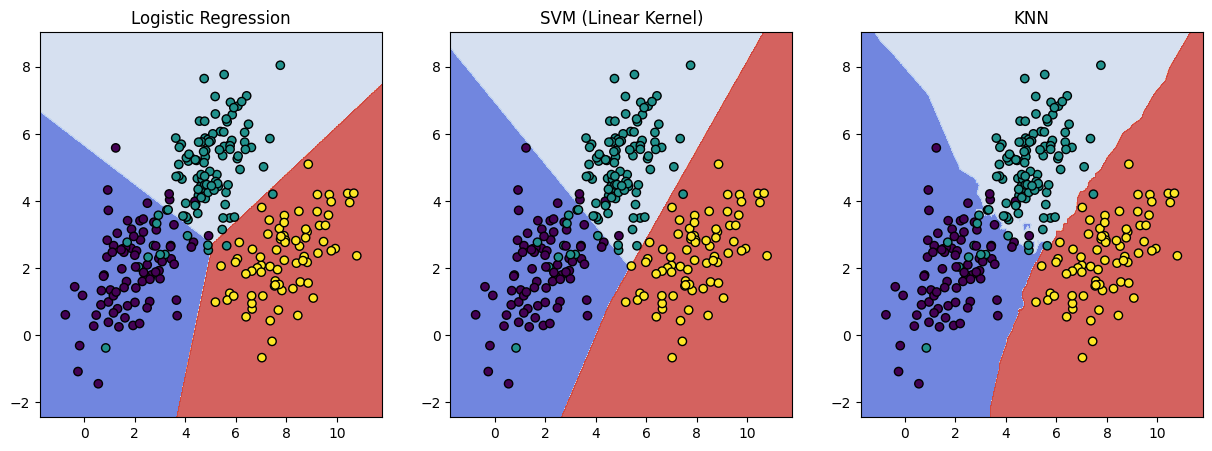

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, (name, model) in zip(axs, models.items()):
    plot_decision_boundary(model, X_test, y_test, ax, name)
    
plt.show()

**Аналіз отриманих результатів**:

1.   KNN найкраще працює з наборами даних, які перекриваються, тому що має здатність використовувати локальні шаблони та адаптуватися до складних структур даних, що забезпечує найвищу точність (precision), запам’ятовуваність (recall) і показники F1 (f1-score).

2.   SVM модель із лінійним ядром показує хорошу загальну продуктивність, але через свою лінійну межу рішення має проблеми з областями, які перекриваються, що робить його менш ефективним у обробці складних перекриттів.

3.   Логістична регресія також обмежена своєю лінійною природою, яка впливає на її здатність керувати перекриттями, що призводить до дещо нижчого запам’ятовування для певних класів порівняно з тим самим KNN.

**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [12]:
df = pd.read_csv('torus_in_torus.csv')

In [13]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [15]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = classification_report(y_test, y_pred, output_dict=True)
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         1.0       0.45      0.45      0.45       155
         2.0       0.42      0.43      0.42       145

    accuracy                           0.44       300
   macro avg       0.44      0.44      0.44       300
weighted avg       0.44      0.44      0.44       300


SVM (RBF Kernel) Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       155
         2.0       1.00      1.00      1.00       145

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


KNN Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       155
         2.0       1.00      1.00      1.00       145

    accuracy                           1.00       300
   macro avg   

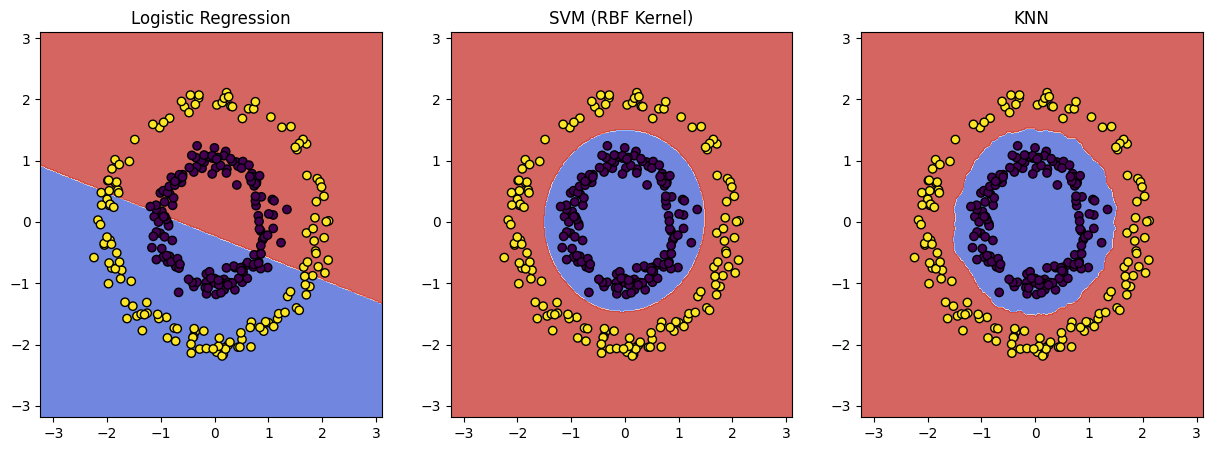

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, model) in zip(axs, models.items()):
    plot_decision_boundary(model, X_test, y_test, ax, name)
    
plt.show()

**Аналіз отриманих результатів**:

1.   SVM із ядром RBF ідеально справляється зі складними топологіями даних, досягаючи 100% точності (precision), запам’ятовування (recall) та показників F1 (f1-score) для обох класів завдяки своїй здатності створювати гнучкі нелінійні межі рішень.

2.   Але не тільки SVM модель продемонструвала гарні результати. KNN також досягає ідеальних результатів за всіма показниками, оскільки вона ефективно адаптується до локальних структур даних, що робить її надійною у захопленні складних шаблонів.

3.   Логістична регресія має помітні проблеми зі складними топологіями, про це свідчить її значно нижча продуктивність через її залежність від лінійних меж рішень, які є очевидно недостатніми для захоплення складних шаблонів даних.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [17]:
df = pd.read_csv('double_helix.csv')

In [18]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [20]:
results = {}

for name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = classification_report(y_test, y_pred, output_dict=True)
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.47      0.56      0.51       150
         1.0       0.45      0.37      0.41       150

    accuracy                           0.46       300
   macro avg       0.46      0.46      0.46       300
weighted avg       0.46      0.46      0.46       300


SVM (RBF Kernel) Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.67      0.62       150
         1.0       0.60      0.50      0.55       150

    accuracy                           0.58       300
   macro avg       0.59      0.58      0.58       300
weighted avg       0.59      0.58      0.58       300


KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       150
         1.0       1.00      0.99      1.00       150

    accuracy                           1.00       300
   macro avg   

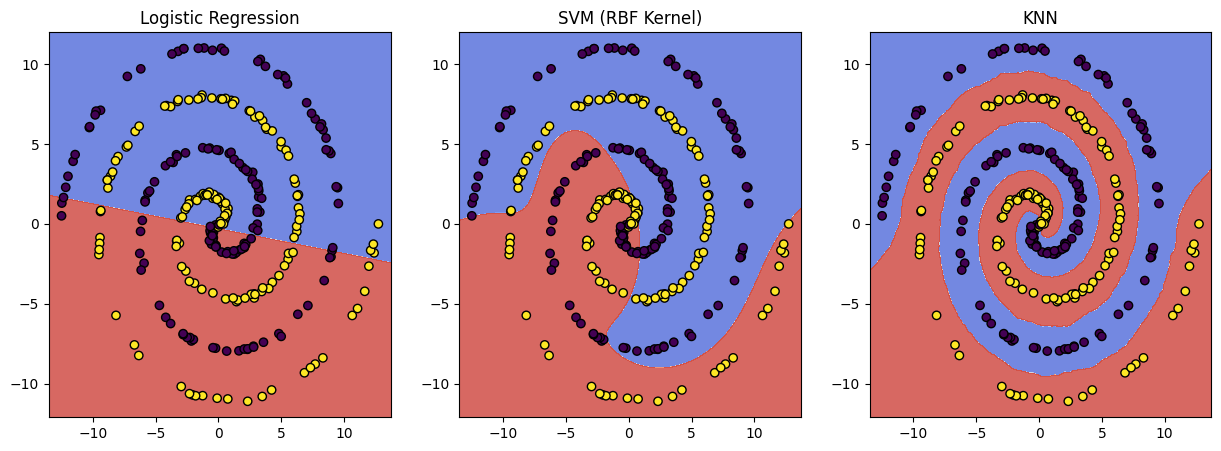

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, model) in zip(axs, models.items()):
    plot_decision_boundary(model, X_test, y_test, ax, name)
    
plt.show()

**Аналіз отриманих результатів**:

1.   KNN модель продемонструвала ідеальний результат. Вона чудово класифікує складні нелінійні топології даних, до прикладу ті самі подвійні спіралі, використовуючи локальні шаблони даних, що забезпечує практично 100% точність і запам’ятовування між класами.

2.   SVM у порівнянні з лінійними моделями справляється краще з нелінійністю, досягаючи високої продуктивності, але все ж ця модель поступається KNN у захопленні складних структур даних.

3.   Логістична регресія має помітні проблеми з нелінійними даними, оскільки її лінійних меж недостатньо для охоплення складних моделей, присутніх у формах подвійної спіралі, що якраз призводить до зниження точності та продуктивності.